In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Importing Some Libraries

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, FunctionTransformer, QuantileTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import make_scorer

from pprint import pprint
from sklearn.decomposition import PCA

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# global matplotlib settings
mpl.rc('figure',figsize=(12,8))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
np.random.seed(42)

# Elementary Data Analysis

# 1. DATA LOADING

In [5]:
data = pd.read_csv('C:/Users/abhi3/Desktop/FINAL PROJECT/train_data_v2.csv')

# 2. Data Description

In [6]:
data.shape

(14731, 22)

In [7]:
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [8]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [10]:
data.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [11]:
print(data.SeasonalPurchase.unique())
print(data.Month_SeasonalPurchase.unique())
print(data.CustomerType.unique())
print(data.Gender.unique())
print(data['Cookies Setting'].unique())
print(data.Education.unique())
print(data['Marital Status'].unique())

[0.  0.4 1.  0.8 0.2 0.6 nan]
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec' nan]
['Returning_Visitor' 'New_Visitor' 'Other' nan]
['Not Specified' 'Female' 'Male' nan]
['Deny' 'ALL' 'Required' nan]
['Not Specified' 'Others' 'Diploma' 'Graduate' nan]
['Other' 'Married' 'Single' nan]


In [12]:
data[['SeasonalPurchase','OS','SearchEngine','Zone','Type of Traffic','WeekendPurchase']] = data[['SeasonalPurchase','OS','SearchEngine','Zone','Type of Traffic','WeekendPurchase']].astype('object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  object 
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  object 
 12  SearchEngine      

# 4. Visualisation of features 

In [14]:
num_cols = data.select_dtypes(include = ['float64']).columns
cat_cols = data.select_dtypes(include = ['object']).columns

In [15]:
num_cols

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values'],
      dtype='object')

# 4.1. Univariate Analysis

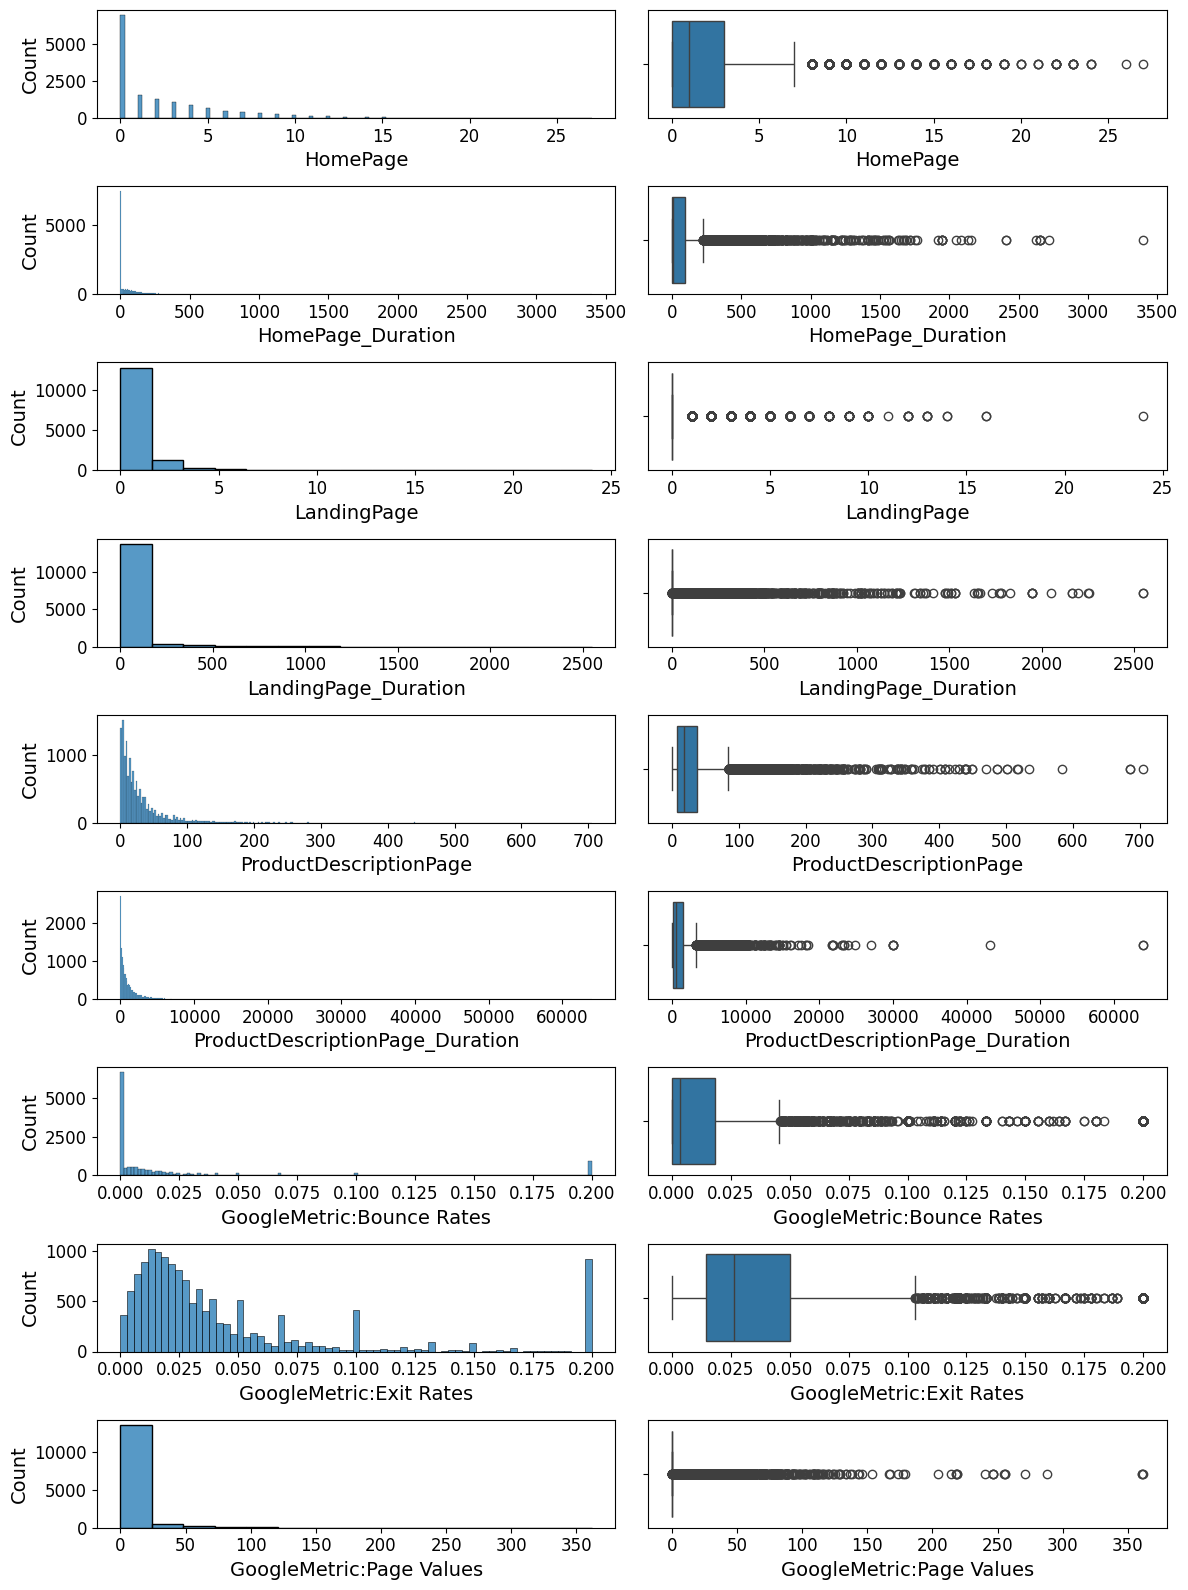

In [16]:
fig, ax = plt.subplots(len(num_cols),2, figsize = (12,16))
for i in range(len(num_cols)):
  sns.histplot(x=data[num_cols[i]], ax = ax[i,0]) # histogram plot
  sns.boxplot(x=data[num_cols[i]], ax = ax[i,1]) # boxplot
plt.tight_layout()

**Observation**

1. Dataset also have lot of outliers, we need to deal with them.
2. Histogram gave the distribution of different feature it's a univariate analysis(graph of it self only)

# 4.2 Bivariate Analysis 

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),annot=True,fmt='.1g')

ValueError: could not convert string to float: 'Feb'

<Figure size 1500x1000 with 0 Axes>

In [18]:
X = data.drop('Made_Purchase', axis = 1)
y = data['Made_Purchase']

In [19]:
numerical_transformer = Pipeline([('impute', SimpleImputer(strategy='mean')),
                                  ('scale', StandardScaler()),
                                  ('transform', QuantileTransformer(output_distribution='normal'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)],
        sparse_threshold=0)

data_new = preprocessor.fit_transform(X, y)




In [21]:
X_train, X_val, y_train, y_val = train_test_split(data_new, y, test_size=0.2, random_state=42)

# 8. Modeling

In [23]:
model = LogisticRegression(C = 5, penalty = 'l2', solver = 'liblinear',  max_iter = 1000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6597080787508486

In [24]:
import pickle
import pandas as pd
import json

def predict_mpg(config):
    ##loading the model from the saved file
    pkl_filename = "model.pkl"
    with open(pkl_filename, 'rb') as f_in:
        model = pickle.load(f_in)

    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    y_pred = model.predict(df)